In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import matplotlib
from matplotlib import patheffects

import seaborn as sns

_30k_main_palette_dict = {
    "blue": "#202F66",
    "orange": "#FF7048",
    "purple": "#8B87EA",
    "pink": "#D869AB",
    "cyan": "#54C9B9",
    "yellow": "#F3D36E",
}

_30k_danger_safe_palette_dict = {
    "danger": "#FF4F72",
    "safe": "#58EDB9",
}

_30k_text_palette_dict = {
    "text_black": "#32363A",
    "text_lighter1": "#6F7273",
    "text_lighter2": "#8B8E8F",
    "bg_cream": "#FAF7F4"
}

_font_mono = "Inconsolata"
_font_serif = "Canela Text"
_font_sans = "Gill Sans"

plt.style.use("./utils/-30k.mplstyle")

_30k = list(_30k_main_palette_dict.values())
sns.set_palette(_30k)
# ← → ↓ ↑


import warnings
warnings.filterwarnings('ignore')

In [2]:
import re
import string

# Load words

In [3]:
word_length = 5

df = pd.read_csv(f"./data/{word_length}-letter words.csv")

df['ratio'] = df['count']/np.sum(df['count'])

df = df.sort_values(by=['count'], ascending=False, ignore_index=True)

vocab_size = len(df)

In [4]:
df

,word,count,ratio
0,which,3561,0.033183
1,there,2728,0.025421
2,would,2714,0.025290
3,their,2669,0.024871
4,about,1815,0.016913
...,...,...,...
16613,gurus,0,0.000000
16614,guser,0,0.000000
16615,gushy,0,0.000000
16616,gusla,0,0.000000


# Word Frequencies (Brown corpus)

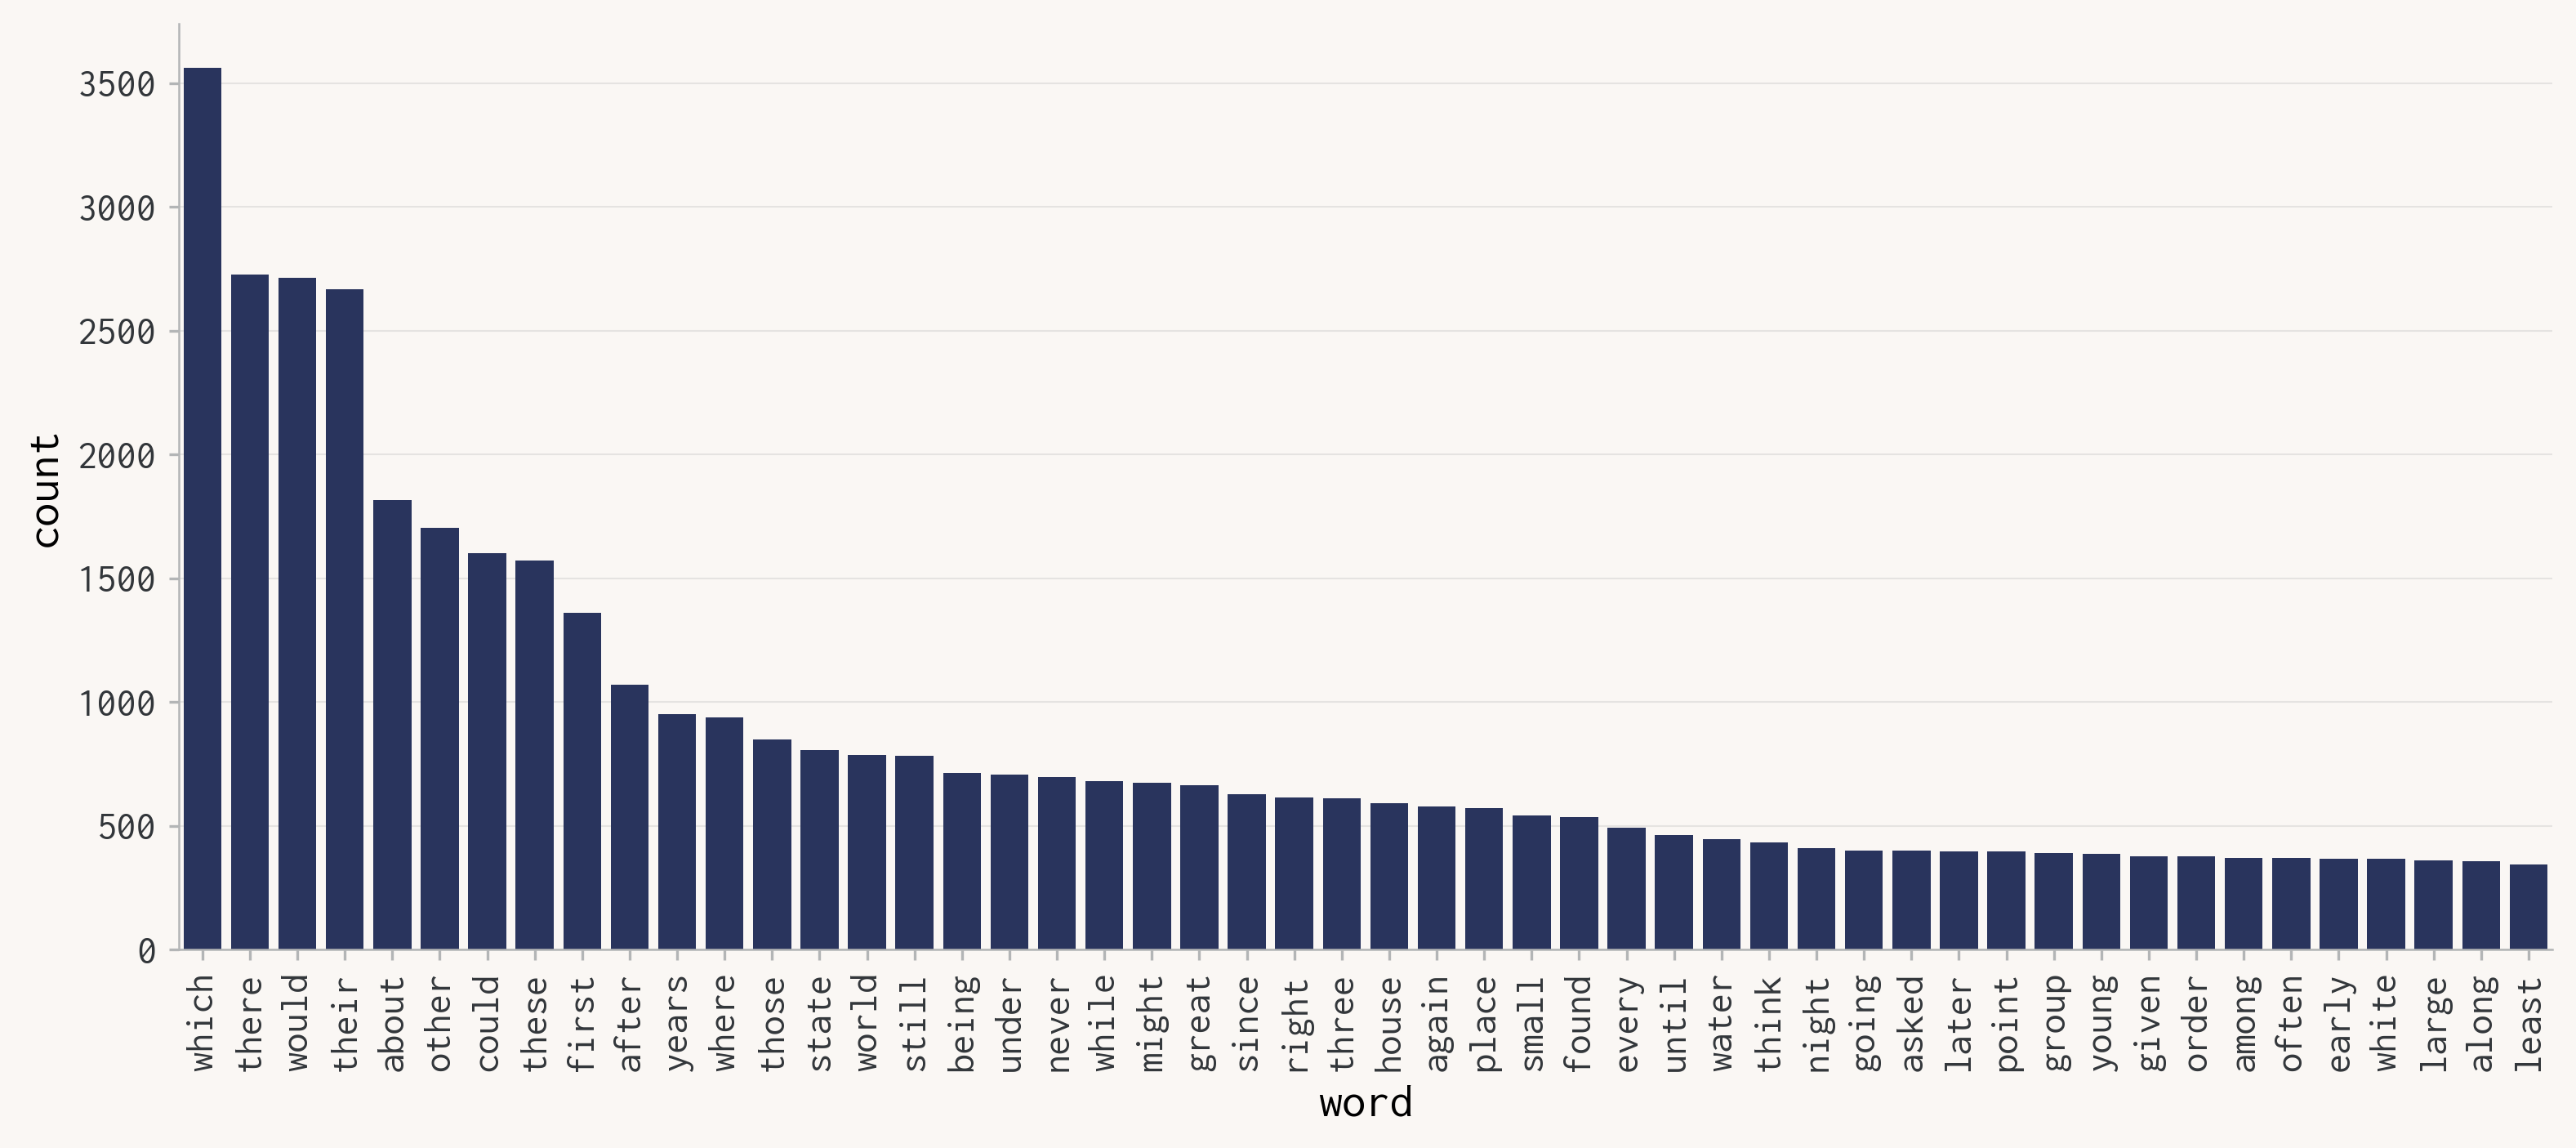

In [5]:
top_n = 50

sns.barplot(df['word'].head(top_n), df['count'].head(top_n), color=_30k_main_palette_dict['blue'])

plt.xticks(df.head(top_n).index, df.head(top_n)['word'], rotation=90)
plt.show()

# Letter Frequencies

In [6]:
letters = pd.DataFrame({
    'letter': list(string.ascii_lowercase),
    'count': 0
})

In [7]:
# probability by possition
for position in range(1, word_length+1):
    letters[position] = 0

In [8]:
for word in df['word']:
    for i, c in enumerate(word):
        letters.loc[letters[letters['letter'] == c].index, 'count'] += 1
        letters.loc[letters[letters['letter'] == c].index, i+1] += 1

In [9]:
letters['ratio'] = letters['count']/np.sum(letters['count'])

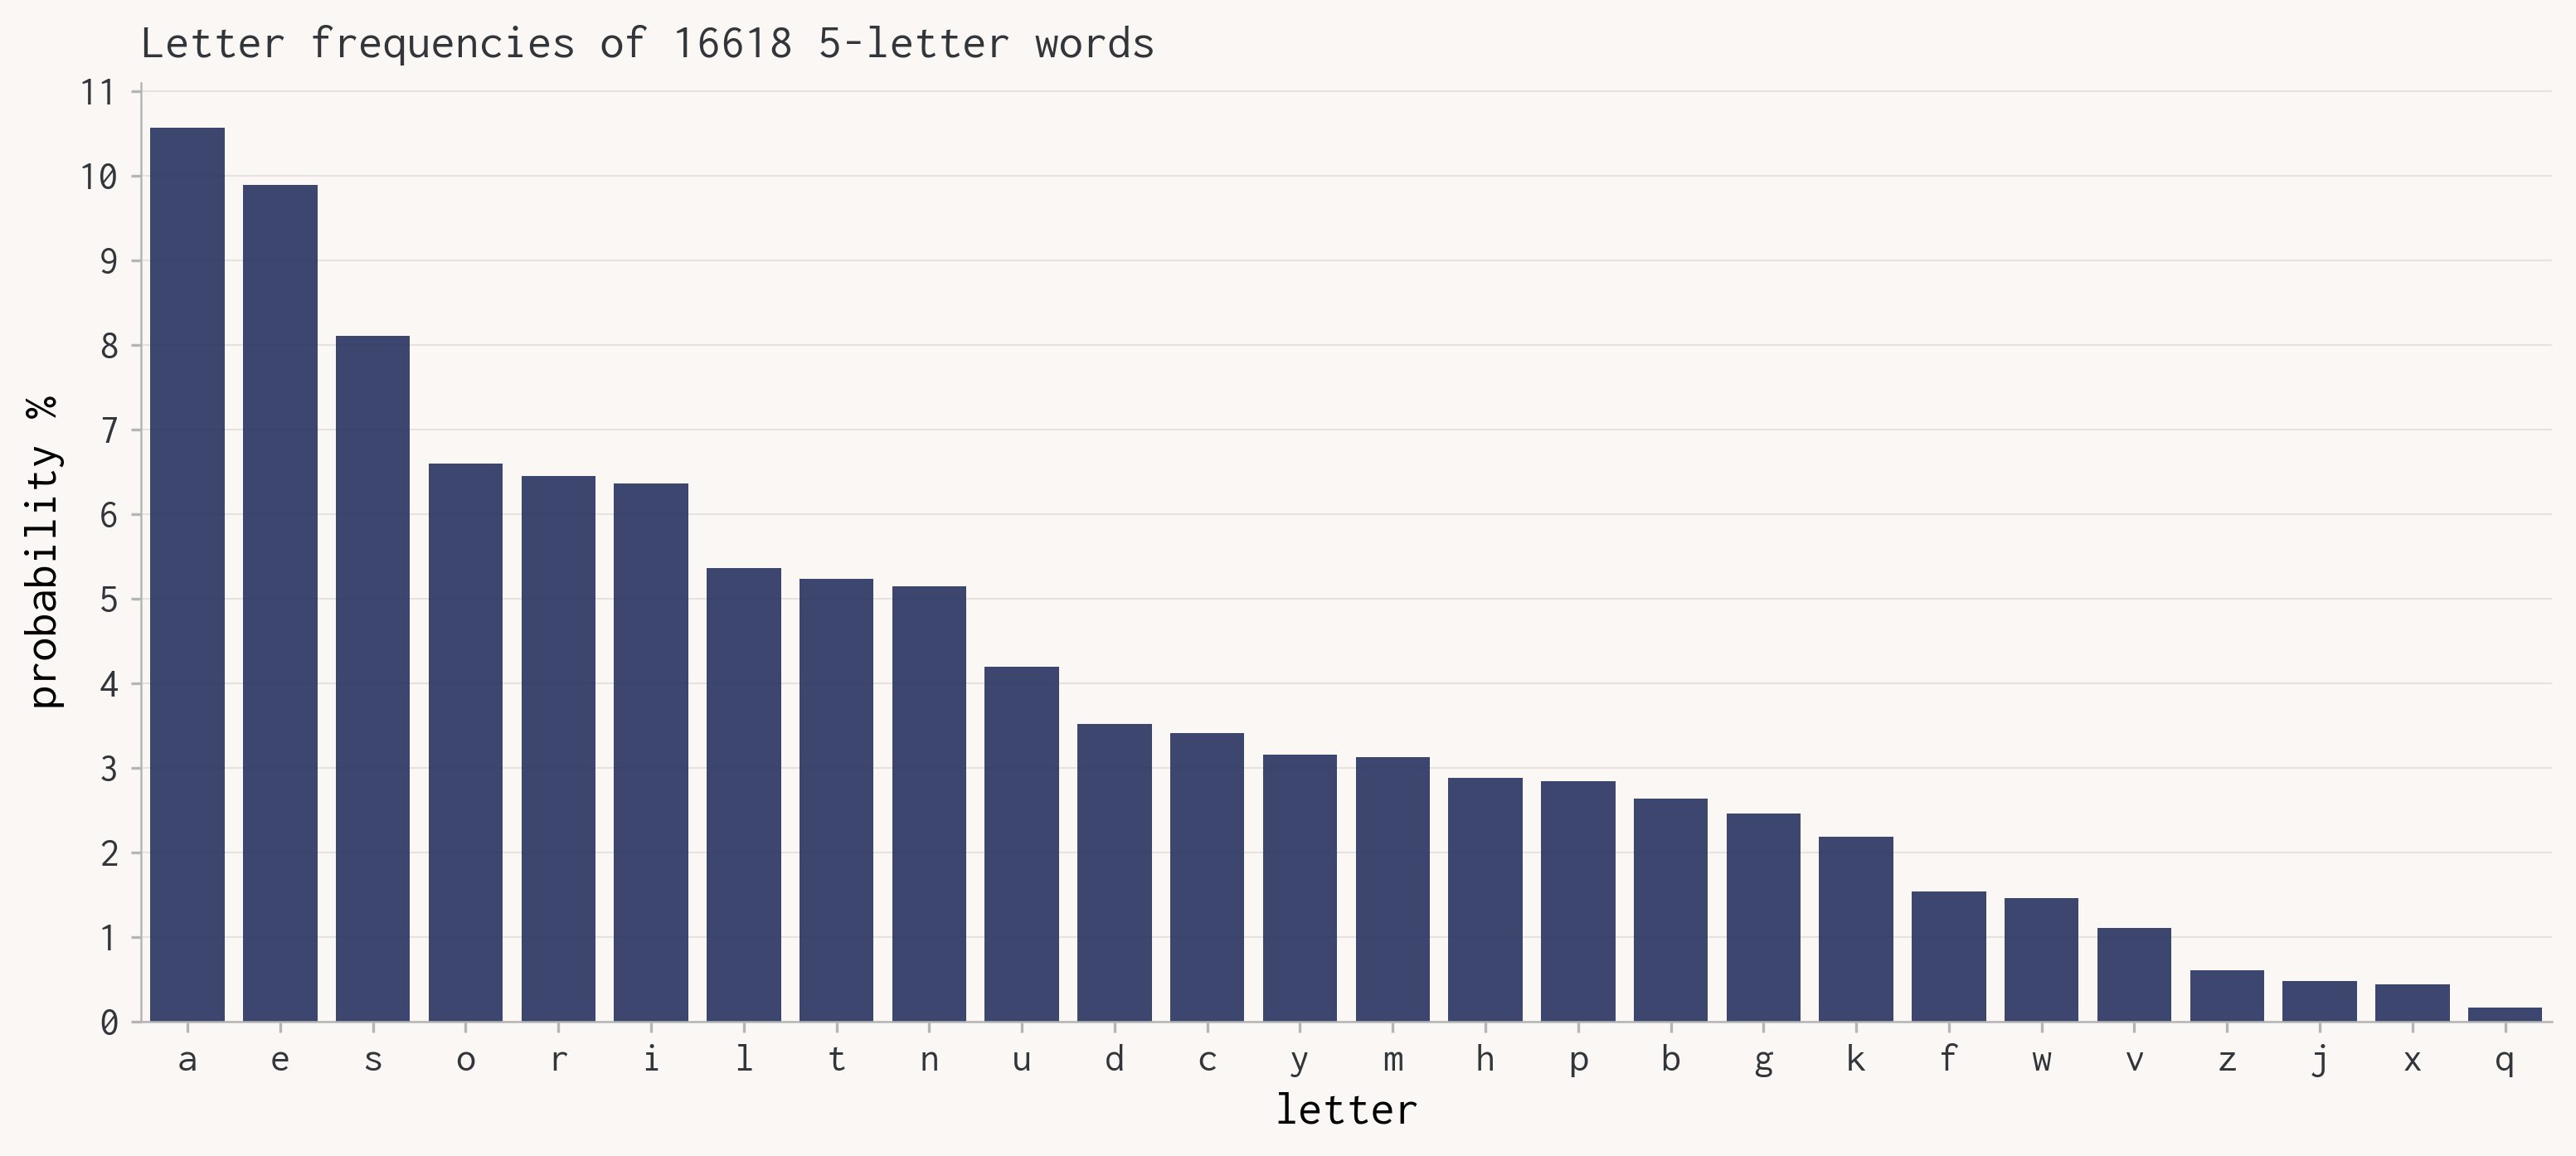

In [10]:
fig = plt.figure()

sns.barplot(data=letters.sort_values(by='ratio', ascending=False), 
            x='letter', y='ratio', color=_30k[0],
           saturation=0.8, alpha=0.9
           )

plt.title(f"Letter frequencies of {vocab_size} {word_length}-letter words")

y_ticks = np.arange(0, np.max(letters['ratio'])*1.1, 0.01)
plt.yticks(y_ticks, [f"{int(i*100)}" for i in y_ticks])

plt.xlabel("letter")
plt.ylabel("probability %")


plt.show()

# Bigram Frequencies

In [11]:
bigrams = []

for a in letters['letter']:
    for b in letters['letter']:
        bigram = a + b
        bigrams.append(bigram)

In [12]:
bigrams = pd.DataFrame({'bigram': bigrams, 'count': 0})

In [13]:
for word in df['word']:
    length = len(word)
    for i in range(length-1):
        bigram = word[i:i+2]
        bigrams.loc[bigrams[bigrams['bigram'] == bigram].index, 'count'] += 1

In [14]:
bigrams['ratio'] = bigrams['count']/np.sum(bigrams['count'])

bigrams.sort_values(by=['ratio'], ascending=False, ignore_index=True, inplace=True)

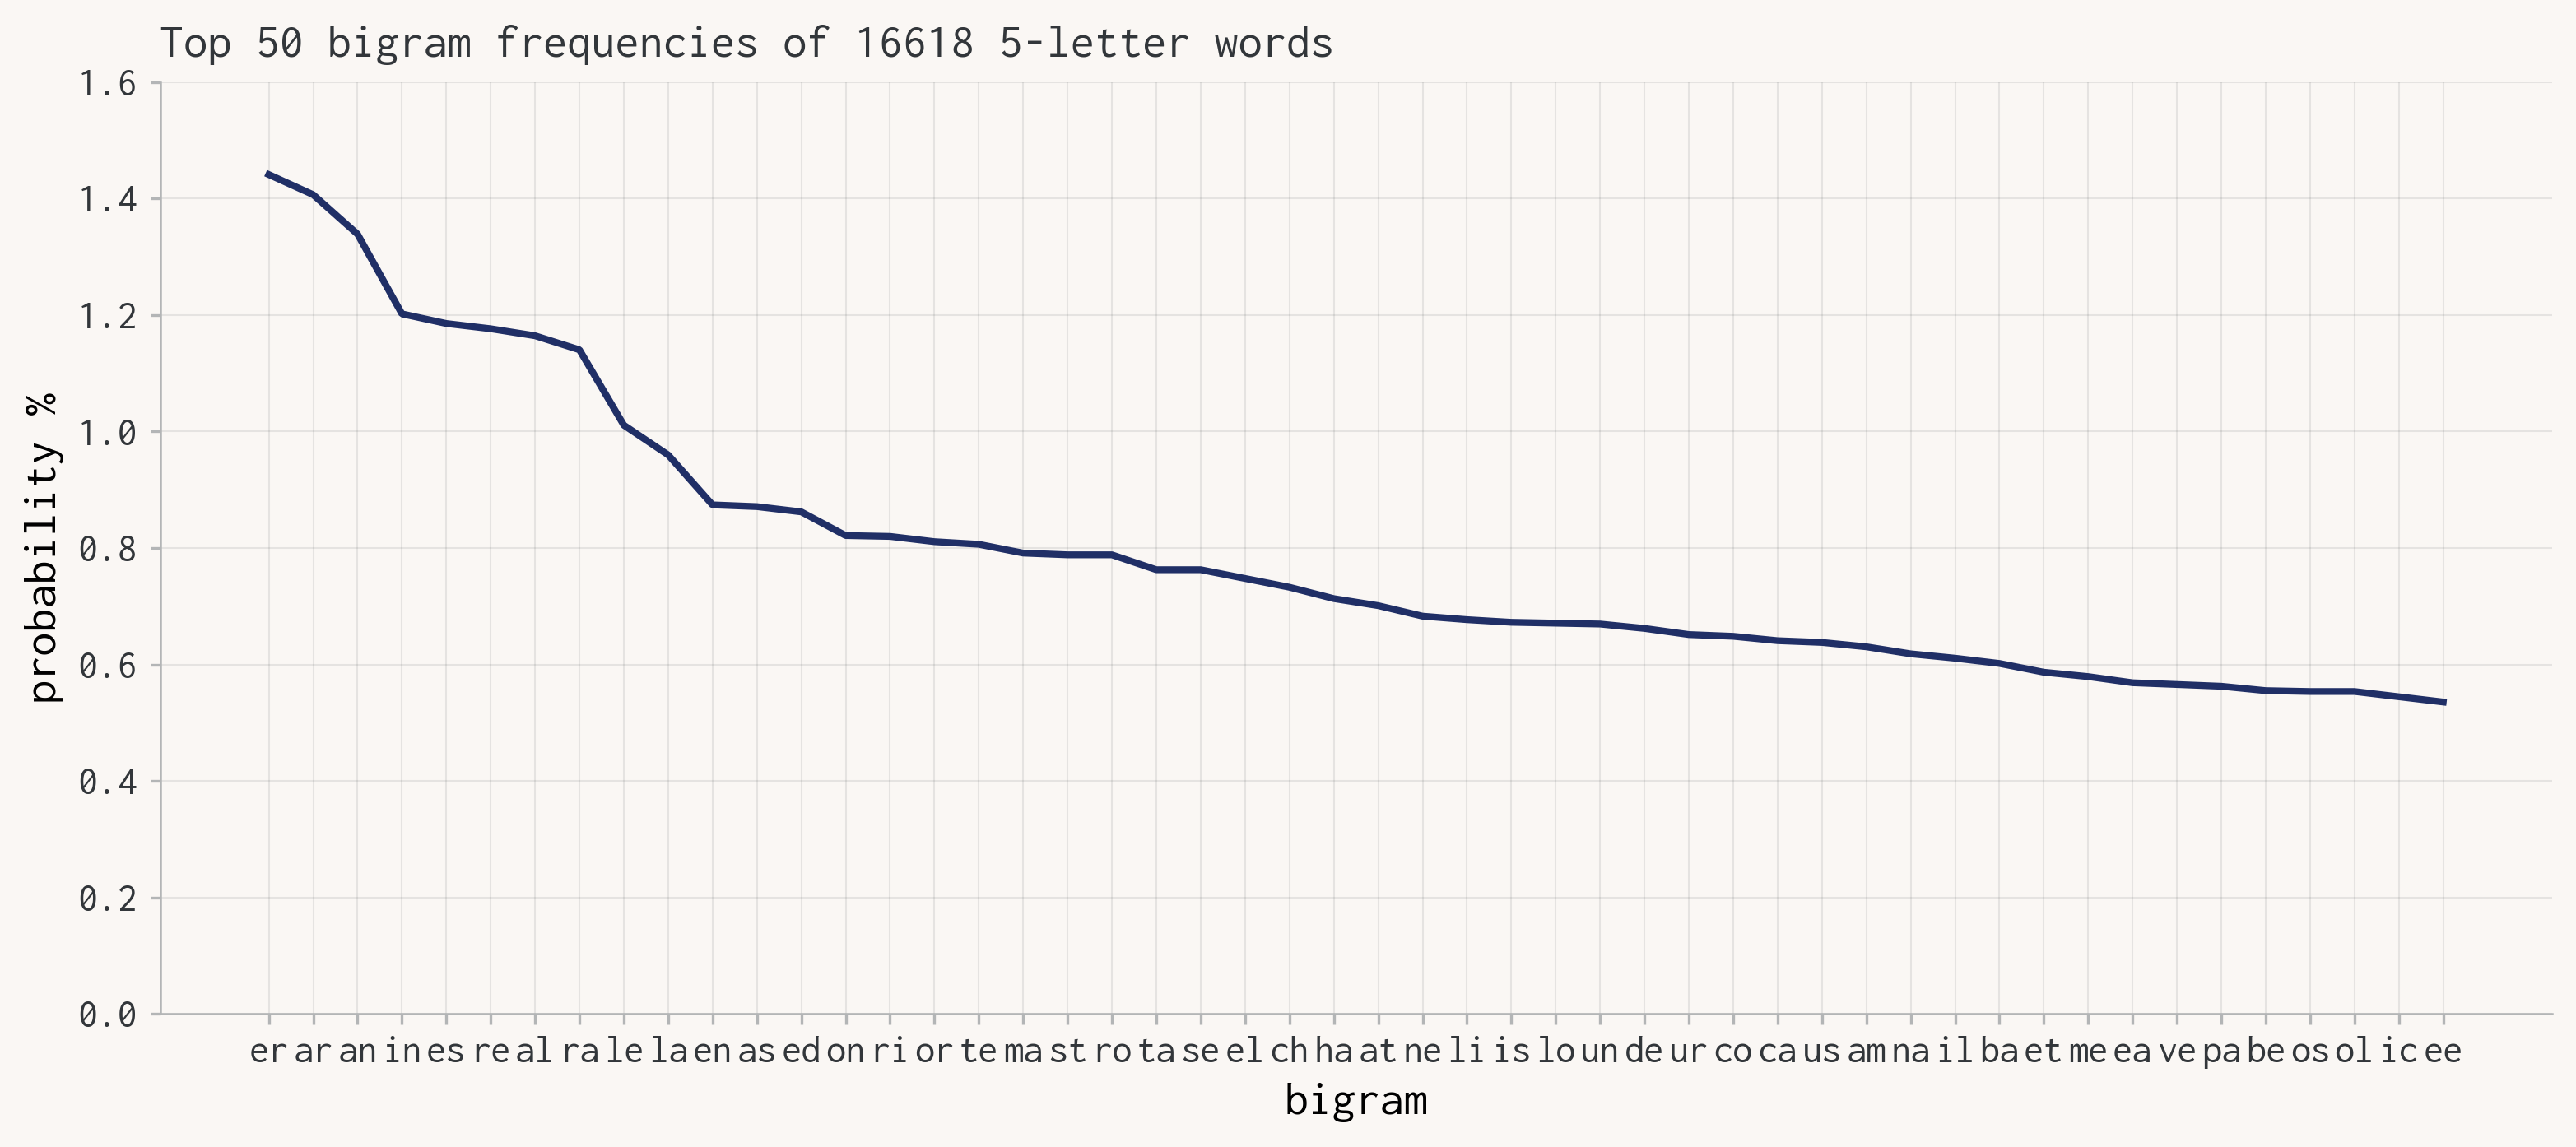

In [15]:
fig = plt.figure()

top_n = 50
top_bigrams = bigrams.head(top_n)

# sns.barplot(data=top_bigrams, 
#             x='bigram', y='ratio', color=_30k[0],
#            saturation=0.8, alpha=0.9
#            )

sns.lineplot(data=top_bigrams, 
            x='bigram', y='ratio', color=_30k[0],
           )

plt.title(f"Top {top_n} bigram frequencies of {vocab_size} {word_length}-letter words")

y_ticks = np.arange(0, np.max(top_bigrams['ratio'])*1.2, 0.002)
plt.yticks(y_ticks, [f"{round(i*100, 2)}" for i in y_ticks])

plt.xlabel("bigram")
plt.ylabel("probability %")


plt.show()

# Probability by positions

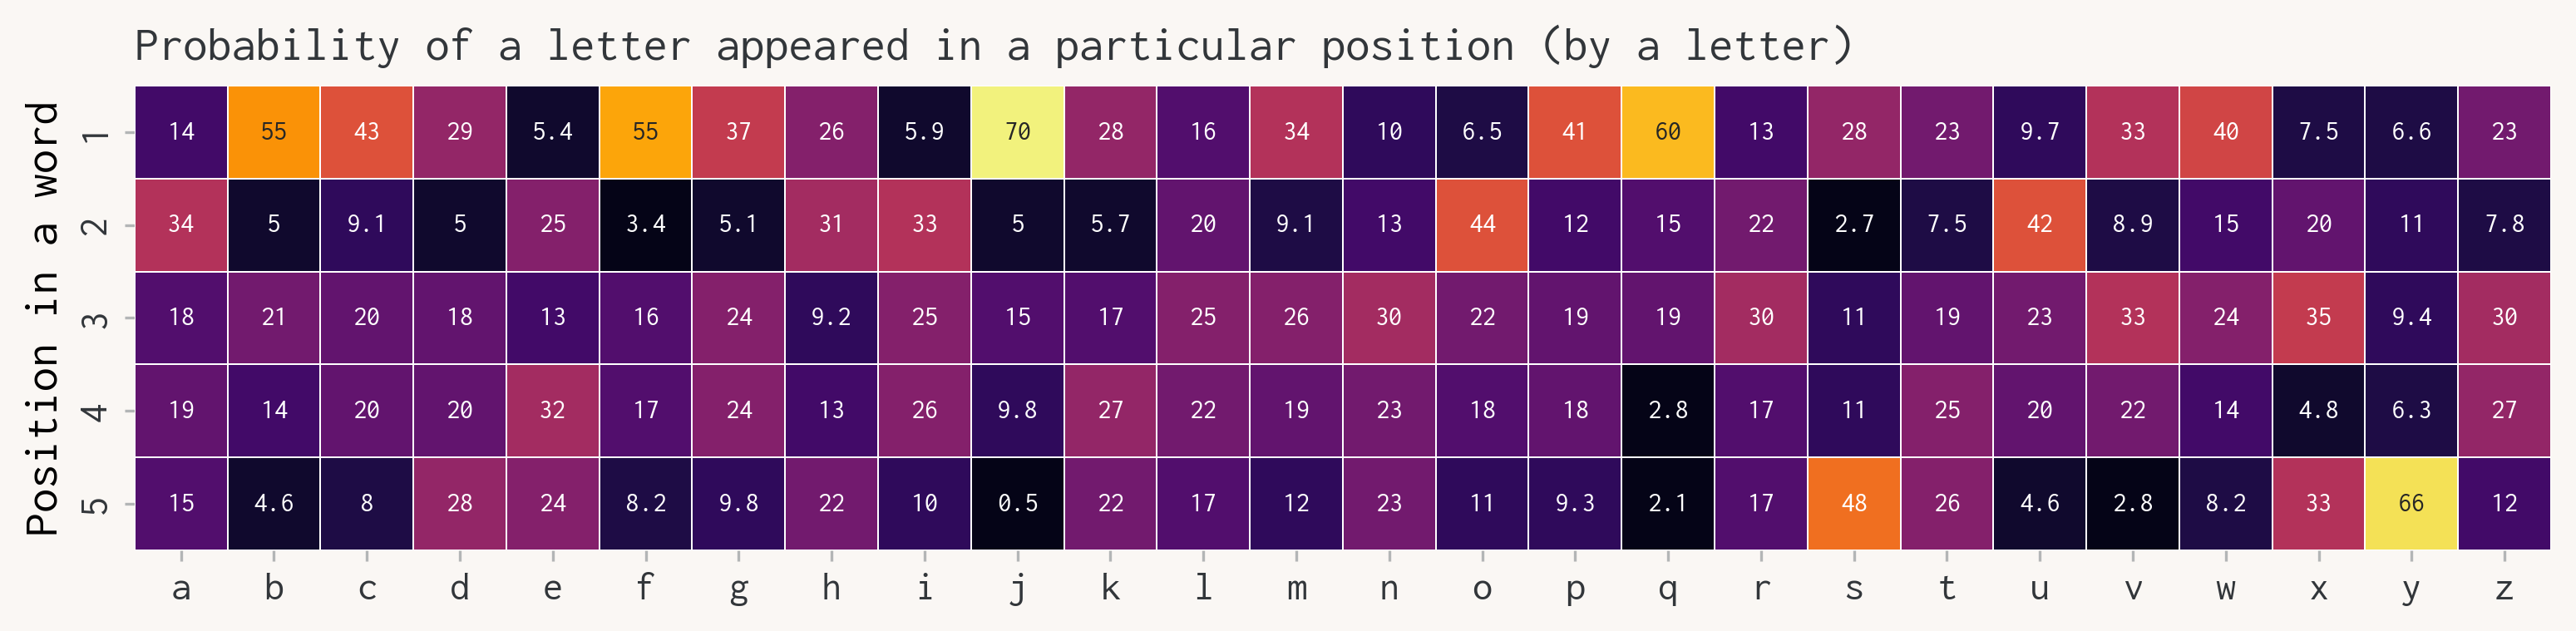

In [16]:
# prob axis
# 0 = by row
# 1 = by col
axis = 1

sns.heatmap(letters[range(1, word_length+1)].apply(lambda x: x/np.sum(x), axis=axis).transpose()*100, 
            cmap=sns.color_palette('inferno', 24), cbar=False,
            square=True, annot=True, annot_kws={'fontsize': 8}, linewidth=0.1)


plt.title("Probability of a letter appeared in a particular position (by a letter)")
plt.xticks(letters.index+0.5, letters['letter'])
plt.ylabel('Position in a word')
plt.show()

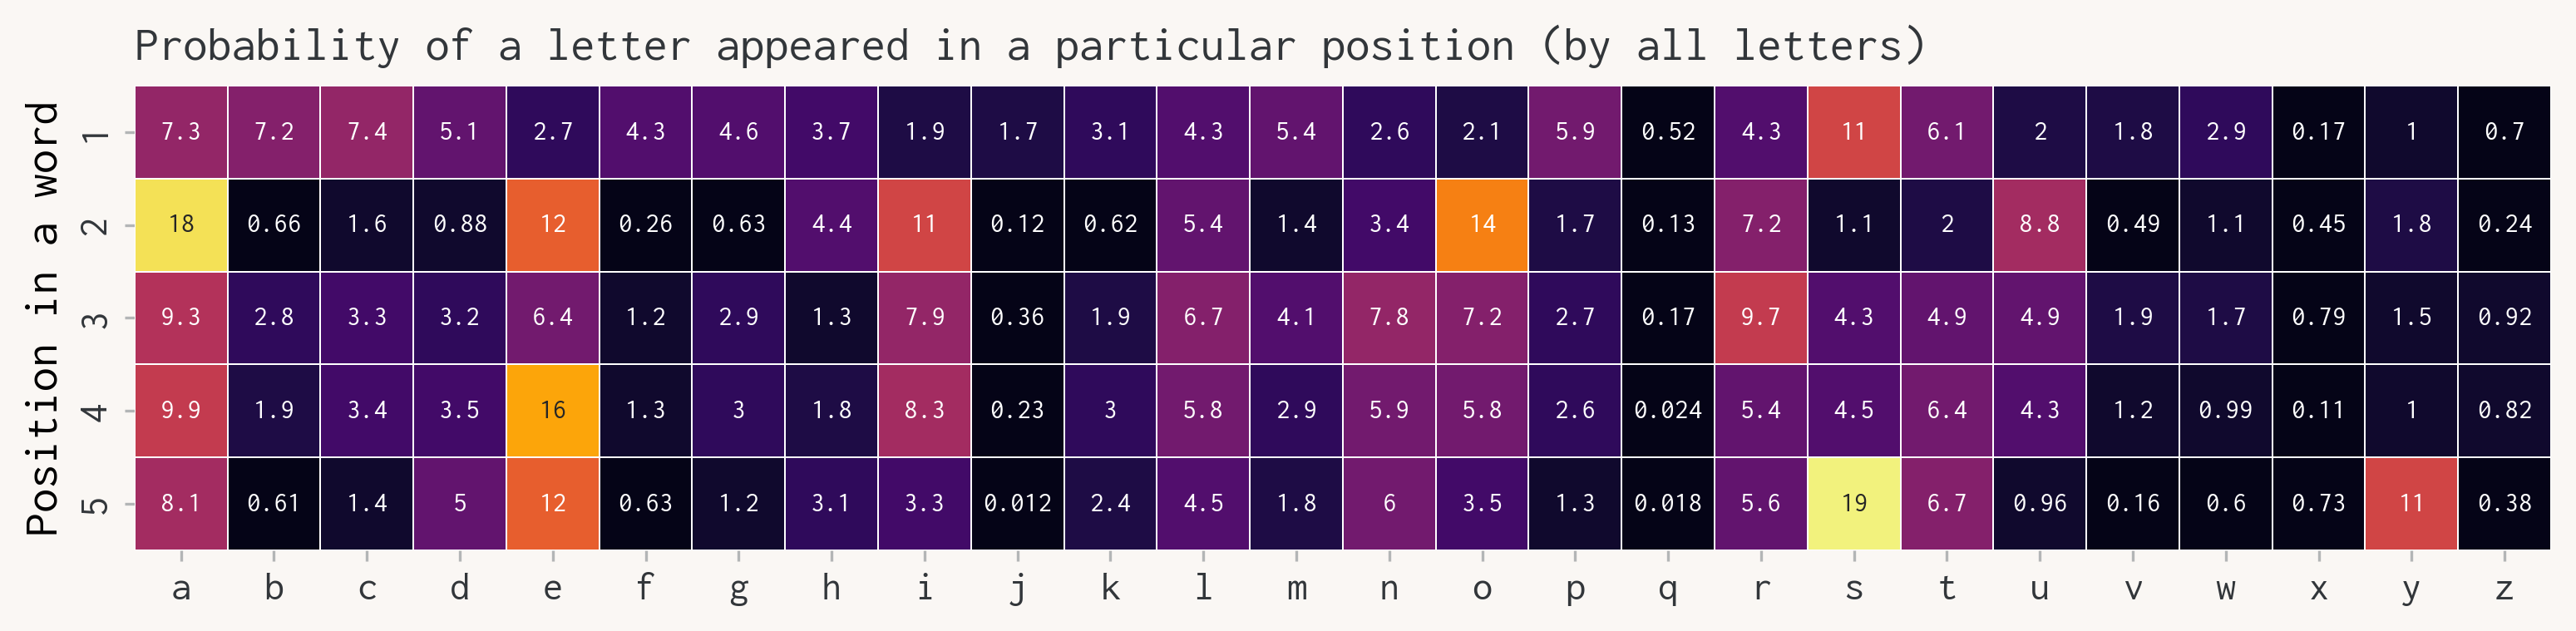

In [17]:
# prob axis
# 0 = by row
# 1 = by col
axis = 0

sns.heatmap(letters[range(1, word_length+1)].apply(lambda x: x/np.sum(x), axis=axis).transpose()*100, 
            cmap=sns.color_palette('inferno', 24), cbar=False,
            square=True, annot=True, annot_kws={'fontsize': 8}, linewidth=0.1)


plt.title("Probability of a letter appeared in a particular position (by all letters)")
plt.xticks(letters.index+0.5, letters['letter'])
plt.ylabel('Position in a word')
plt.show()

In [18]:
df[df['word'].str.contains['hac']]

TypeError: 'method' object is not subscriptable